# 102.5. Rubin data access with LSDB

<div style="max-width:300px; float: left; margin-right: 1em">

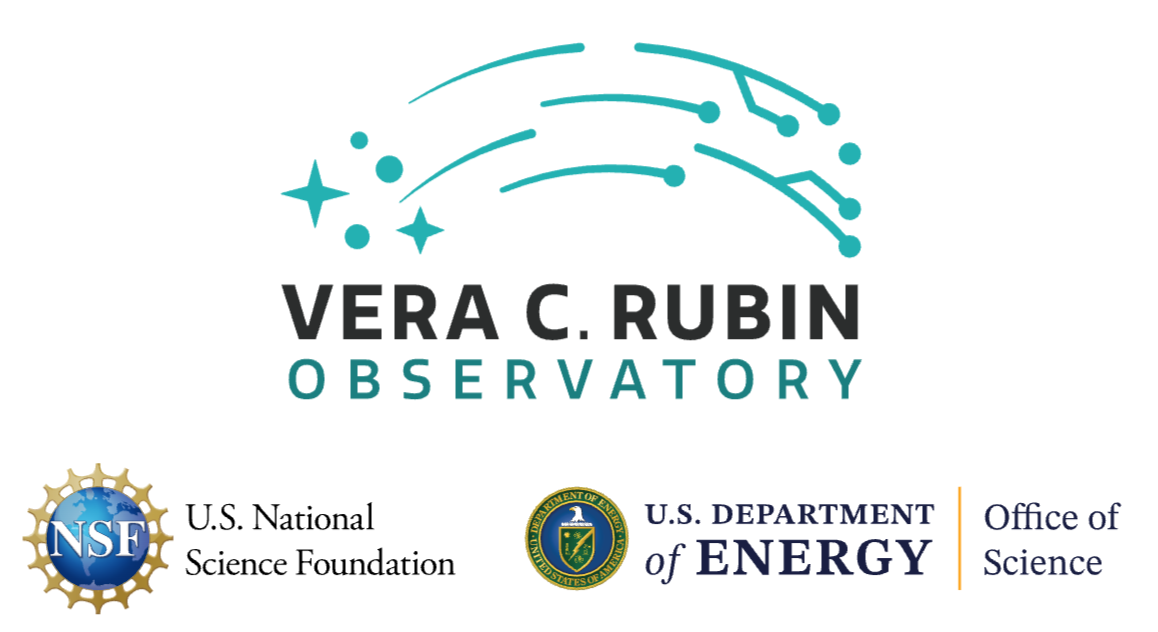

</div>

For the Rubin Science Platform at data.lsst.cloud. <br>
Data Release: <a href="https://dp1.lsst.io/">Data Preview 1</a> <br>
Container Size: Large <br>
LSST Science Pipelines version: Release r29.2.0 <br>
Last verified to run: 2025-09-18 <br>
Repository: <a href="https://github.com/lsst/tutorial-notebooks">github.com/lsst/tutorial-notebooks</a> <br>

**Learning objective:** How to access Rubin data in LSDB format.

**LSST data products:** `Object`, `DiaObject`

**Packages:** `lsdb`

**Credit:**
Originally developed by Andrés A. Plazas Malagón, Melissa Graham, and the Rubin Community Science team with input from Neven Caplar and Tianqing Zhang.
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the
<a href="https://community.lsst.org/c/support">Support Category</a>
of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

[LSDB](https://docs.lsdb.io/) (Large Scale Database) is an open-source Python framework that enables fast all-sky cross-matching, bulk application of user-defined functions, and simplified analysis of time-domain (light curve) data.
It operates on data stored in the [HATS](https://hats.readthedocs.io/) data format that provides an efficient, spatially-indexed format for storing catalog data.
Built on top of [Dask](https://docs.dask.org/), LSDB uses the [HATS](https://hats.readthedocs.io/) (Hierarchical Adaptive Tiling Scheme) data format ([HEALPix](https://healpix.sourceforge.io/documentation.php)-sharded [Parquet](https://parquet.apache.org/docs/)) to efficiently perform spatial operations.

LSDB also hosts many other datasets stored in the HATS format, beyond the DP1 catalogs shown in this tutorial, but **only the DP1 dataset is available in the RSP**.
Find the full list of LSDB-hosted datasets at [data.lsdb.io](https://data.lsdb.io/).

**Note:** This notebook is intended only as a simple tutorial on LSDB DP1 catalogs.
For more detailed examples and advanced use cases, see the full set of LSDB tutorials at [LSDB tutorials](https://docs.lsdb.io/en/latest/tutorials.html).

**References:**

- Descriptions of LSDB-formatted Data Preview 1 (DP1) data: [https://data.lsdb.io/](https://data.lsdb.io/)
- LSDB documentation: [docs.lsdb.io](https://docs.lsdb.io/en/latest/index.html)
- [Working with Rubin Data using LSDB](https://docs.lsdb.io/en/latest/tutorial_toc/toc_rubin.html)
- [LSDB hackathon at the Rubin Community Workshop 2025](https://github.com/lincc-frameworks/RCW_Hackathon_2025_LSDB/tree/main)

**Related tutorials:** The 200-level tutorials on the `Object` and `DiaObject` catalogs. The 300-level tutorial on how to access photometric redshifts in LSDB-formatted files. 

### 1.1. Import packages

Import the [LSDB package](https://github.com/astronomy-commons/lsdb/) to work with LSDB-formatted files, [`upath`](https://github.com/fsspec/universal_pathlib) for handling local and remote file paths uniformly, and `matplotlib.pyplot` for visualization.

In [28]:
import lsdb

import astropy.units as u
from astropy.coordinates import SkyCoord
from upath import UPath
import matplotlib.pyplot as plt

Set the base path to the LSDB-formatted DP1 data in the RSP.

In [29]:
base_path = UPath("/rubin/lsdb_data")

## 2. Access the LSDB DP1 catalogs

The four LSDB DP1 read-only catalogs available in the Rubin Science Platform at `data.lsst.cloud` are located in the directory `/rubin/lsdb_data`, and their names are:

- `object_collection`: the `Object` table
- `object_collection_lite`: a limited number of columns from the `Object` table
- `dia_object_collection`: the `DiaObject` table
- `object_photoz`: photometric redshift (photo-z) estimates for galaxies

Note that the `object_photoz` catalog was not part of the DP1 release (see Section 2.3, below).

### 2.1. object_collection

This LSDB-formatted file is the same as the DP1 `Object` table but with additional columns, `<f>_psfMag` and `<f>_psfMagErr`, which are the corresponding `<f>_psfFlux` columns converted to magnitudes (for each filter, `<f>`, in $ugrizy$).

[Schema browser for the DP1 Object table](https://sdm-schemas.lsst.io/dp1.html#Object).

Nested columns also have additional columns such as `psfMag` and `psfMagErr` (see section 2.1.2 below).

#### 2.1.1. Load and display the catalog

In [30]:
object_cat = lsdb.open_catalog(base_path / "object_collection")

In [31]:
object_cat

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=389,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<coord_ra: [double], coord_dec: [double]..."
"Order: 8, Pixel: 2176",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2302101",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**Lazily loaded catalogs:** note the message under the displayed table above, that all of the columns have been loaded "lazily".
This is always the default for LSDB catalogs, and it means that only the metadata is loaded at first.
This way, LSDB can plan how tasks will be executed in the future without actually doing any computation.

`Order` is the HEALPix resolution, and `Pixel` is the HEALPix index of the specific sky patch.

#### 2.1.2. Show column names

Display the subset of 42 columns that are lazily loaded by default.

In [32]:
object_cat.columns

Index(['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr', 'g_psfFlux',
       'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr', 'i_psfFlux', 'i_psfFluxErr',
       'i_psfMag', 'i_psfMagErr', 'objectId', 'patch', 'r_psfFlux',
       'r_psfFluxErr', 'r_psfMag', 'r_psfMagErr', 'refBand', 'refFwhm',
       'shape_flag', 'shape_xx', 'shape_xy', 'shape_yy', 'tract', 'u_psfFlux',
       'u_psfFluxErr', 'u_psfMag', 'u_psfMagErr', 'x', 'xErr', 'y',
       'y_psfFlux', 'y_psfFluxErr', 'y_psfMag', 'y_psfMagErr', 'yErr',
       'z_psfFlux', 'z_psfFluxErr', 'z_psfMag', 'z_psfMagErr',
       'objectForcedSource'],
      dtype='object')

Optional: uncomment the cell below to display the names of a larger subset of the 1304 columns from the `Object` catalog.

In [68]:
# object_cat.all_columns

Show only the additional columns in the LSDB catalog that contains the PSF fluxes converted to magnitudes.

In [59]:
for col in object_cat.all_columns:
    if col.find('psfMag') > 0:
        print(col)

u_psfMag
u_psfMagErr
g_psfMag
g_psfMagErr
r_psfMag
r_psfMagErr
i_psfMag
i_psfMagErr
z_psfMag
z_psfMagErr
y_psfMag
y_psfMagErr


Check which columns are [nested](https://docs.lsdb.io/en/latest/tutorials/pre_executed/nestedframe.html).

In [35]:
object_cat.nested_columns

['objectForcedSource']

Display the fields in the nested column.
Note the additional columns `psfMag` and `psfMagErr`.

In [36]:
object_cat["objectForcedSource"].nest.fields

['coord_ra',
 'coord_dec',
 'visit',
 'detector',
 'band',
 'psfFlux',
 'psfFluxErr',
 'psfFlux_flag',
 'psfDiffFlux',
 'psfDiffFluxErr',
 'psfDiffFlux_flag',
 'pixelFlags_bad',
 'pixelFlags_cr',
 'pixelFlags_crCenter',
 'pixelFlags_edge',
 'pixelFlags_interpolated',
 'pixelFlags_interpolatedCenter',
 'pixelFlags_nodata',
 'pixelFlags_saturated',
 'pixelFlags_saturatedCenter',
 'pixelFlags_suspect',
 'pixelFlags_suspectCenter',
 'invalidPsfFlag',
 'forcedSourceId',
 'psfMag',
 'psfMagErr',
 'midpointMjdTai']

Load only selected columns

In [37]:
use_columns = ['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr',
               'g_psfFlux', 'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr']

In [38]:
object_cat_selected_columns = lsdb.open_catalog(base_path / "object_collection",
                                                columns=use_columns)

In [39]:
object_cat_selected_columns.columns

Index(['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr', 'g_psfFlux',
       'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr'],
      dtype='object')

#### 2.1.3. Execute a cone search

Cone searches are supported and defined by a center (`ra`, `dec`), in degrees, and a radius `r`, in arcseconds.
Execute a cone search on the object catalog using the coordinates (in degrees) of the Extended Chandra Deep Field South DP1 target field, with a radius of 0.1 deg.

In [40]:
ra_ecdfs = 53.16
dec_ecdfs = -28.10

In [41]:
object_cat_ecdfs = object_cat.cone_search(ra=ra_ecdfs, dec=dec_ecdfs,
                                          radius_arcsec=0.1 * 3600.0)

This table contains only 8 partitions, compared to the 389 described in Section 2.1.1, due to the 0.1-degree spatial restriction.

In [42]:
object_cat_ecdfs

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 9, Pixel: 2299851",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<coord_ra: [double], coord_dec: [double]..."
"Order: 9, Pixel: 2299854",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2299876",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2299878",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [43]:
object_cat_ecdfs.columns

Index(['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr', 'g_psfFlux',
       'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr', 'i_psfFlux', 'i_psfFluxErr',
       'i_psfMag', 'i_psfMagErr', 'objectId', 'patch', 'r_psfFlux',
       'r_psfFluxErr', 'r_psfMag', 'r_psfMagErr', 'refBand', 'refFwhm',
       'shape_flag', 'shape_xx', 'shape_xy', 'shape_yy', 'tract', 'u_psfFlux',
       'u_psfFluxErr', 'u_psfMag', 'u_psfMagErr', 'x', 'xErr', 'y',
       'y_psfFlux', 'y_psfFluxErr', 'y_psfMag', 'y_psfMagErr', 'yErr',
       'z_psfFlux', 'z_psfFluxErr', 'z_psfMag', 'z_psfMagErr',
       'objectForcedSource'],
      dtype='object')

Visualize the object distribution in the region.

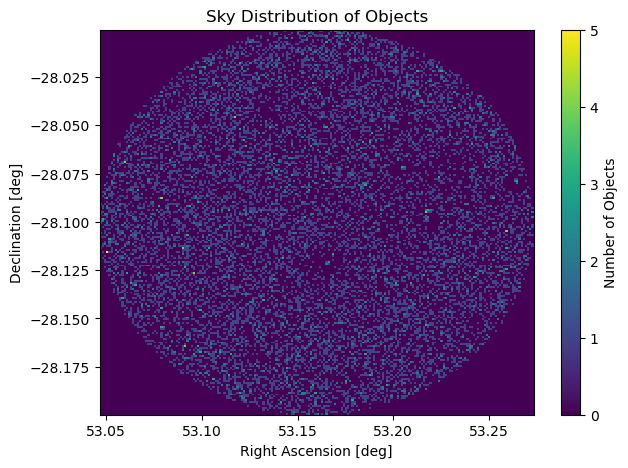

In [44]:
plt.figure(figsize=(7, 5))
plt.hist2d(object_cat_ecdfs['coord_ra'], object_cat_ecdfs['coord_dec'],
           bins=200, cmap='viridis')
plt.colorbar(label="Number of Objects")
plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")
plt.title("Sky Distribution of Objects")
plt.show()

> **Figure 1:** A 2-dimensional distribution (heatmap) of the number of objects across the sky, as returned by the cone search centered on the ECDFS field.

#### 2.1.4. Execute a query on column values

It is possible to filter LSDB catalogs using the `.query()` method.  
The query expression is written as a string and follows the same syntax as [Pandas `.query()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html), which supports a subset of Python expressions for filtering DataFrames.

Select only objects with an **r-band PSF magnitude between 16 and 24**

In [45]:
object_cat_mag_range = object_cat.query("r_psfMag > 16 and r_psfMag < 24")
object_cat_mag_range

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=389,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<coord_ra: [double], coord_dec: [double]..."
"Order: 8, Pixel: 2176",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2302101",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Use the `.head()` method to quickly inspect a few rows to check that the query worked as expected.

In [46]:
object_cat_mag_range.head(10)

coord_dec  coord_decErr   coord_ra  coord_raErr  \
_healpix_29                                                         
9195875808926578   6.055018      0.000014  38.112638     0.000027   
9195883532105479   6.060315      0.000014  38.113882     0.000016   
9195884147047980   6.059977      0.000077  38.110133     0.000113   
9195885212200071   6.062188      0.000008  38.113154     0.000008   
9195885679351887   6.062607      0.000014  38.111146     0.000017   
9195895412822106   6.063319      0.000142  38.117222      0.00025   
9195975821955136   6.062018      0.000002  38.099862     0.000002   
9195977793920544   6.064204      0.000033  38.107842     0.000027   
9195978049796578   6.065086      0.000003  38.109232     0.000005   
9195978078224513   6.065384      0.000017  38.108353     0.000019   

                     g_psfFlux  g_psfFluxErr   g_psfMag  g_psfMagErr  \
_healpix_29                                                            
9195875808926578   1274.516846     97.626991  23.636637      0.08333   
9195883532105479     89.467979     75.252007   26.52083     1.329962   
9195884147047980    550.610413     76.316589   24.54789     0.151462   
9195885212200071   1776.998657      77.35807  23.275782     0.047295   
9195885679351887    890.506226       76.1539  24.025908     0.093077   
9195895412822106    613.264221     96.621689  24.430882     0.172498   
9195975821955136  20678.574219     98.712624  20.611198     0.005183   
9195977793920544    716.549133     75.797112  24.261885     0.115281   
9195978049796578   5265.098633     80.913536  22.096483     0.016687   
9195978078224513    806.570007     76.026337  24.133394     0.102645   

                     i_psfFlux  i_psfFluxErr  ...  y_psfFlux  y_psfFluxErr  \
_healpix_29                                   ...                            
9195875808926578          <NA>          <NA>  ...       <NA>          <NA>   
9195883532105479          <NA>          <NA>  ...       <NA>          <NA>   
9195884147047980          <NA>          <NA>  ...       <NA>          <NA>   
9195885212200071          <NA>          <NA>  ...       <NA>          <NA>   
9195885679351887          <NA>          <NA>  ...       <NA>          <NA>   
9195895412822106          <NA>          <NA>  ...       <NA>          <NA>   
9195975821955136  93029.984375    400.546143  ...       <NA>          <NA>   
9195977793920544   1638.996582    288.262207  ...       <NA>          <NA>   
9195978049796578  16507.730469    303.508453  ...       <NA>          <NA>   
9195978078224513   1609.817871    287.098694  ...       <NA>          <NA>   

                  y_psfMag  y_psfMagErr      yErr  z_psfFlux  z_psfFluxErr  \
_healpix_29                                                                  
9195875808926578      <NA>         <NA>  0.253183       <NA>          <NA>   
9195883532105479      <NA>         <NA>  0.253343       <NA>          <NA>   
9195884147047980      <NA>         <NA>  1.393253       <NA>          <NA>   
9195885212200071      <NA>         <NA>   0.13731       <NA>          <NA>   
9195885679351887      <NA>         <NA>  0.249914       <NA>          <NA>   
9195895412822106      <NA>         <NA>  2.553389       <NA>          <NA>   
9195975821955136      <NA>         <NA>  0.029594       <NA>          <NA>   
9195977793920544      <NA>         <NA>  0.585919       <NA>          <NA>   
9195978049796578      <NA>         <NA>  0.060191       <NA>          <NA>   
9195978078224513      <NA>         <NA>  0.314163       <NA>          <NA>   

                  z_psfMag z_psfMagErr  \
_healpix_29                              
9195875808926578      <NA>        <NA>   
9195883532105479      <NA>        <NA>   
9195884147047980      <NA>        <NA>   
9195885212200071      <NA>        <NA>   
9195885679351887      <NA>        <NA>   
9195895412822106      <NA>        <NA>   
9195975821955136      <NA>        <NA>   
9195977793920544      <NA>        <NA>   
9195978049796578      <NA>    

Optional: uncomment the following cell and press "tab" to browse more availabe methods.

In [47]:
# object_cat.

### 2.2. object_collection_lite

The `object_collection_lite` LSDB catalog is a reduced version of the `Object` catalog in `object_collection`. It contains 74 commonly used columns that provide basic object properties, including object identifiers, sky coordinates with uncertainties, basic shape measurements, flags, and PSF- and Kron-based fluxes and magnitudes (with uncertainties) across the six Legacy Survey of Space and Time (LSST) bands ($ugrizy$).

Get the catalog.

In [48]:
object_cat_lite = lsdb.open_catalog(base_path / "object_collection_lite")

The same 42 default columns are loaded lazily for the `object_collection_lite` as for the `object_collecation` catalog.

In [49]:
object_cat_lite

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=389,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<band: [string], coord_dec: [double], co..."
"Order: 8, Pixel: 2176",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2302101",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Option to display all 74 of the columns.

In [50]:
# object_cat_lite.all_columns

### 2.3. dia_object_collection

This LSDB-formatted file is the same as the DP1 `DiaObject` table.

[Schema browser for the DP1 DiaObject table](https://sdm-schemas.lsst.io/dp1.html#DiaObject).

In [51]:
dia_object_cat = lsdb.open_catalog(base_path / "dia_object_collection")

Check which columns are nested.

In [69]:
dia_object_cat.nested_columns

['diaObjectForcedSource', 'diaSource']

Display the fields in the `diaSource` nested column.
Note the additional columns such as `psfMag`, `psfMagErr`, `scienceMag` and `scienceMagErr`.

In [72]:
dia_object_cat["diaSource"].nest.fields

['band',
 'centroid_flag',
 'coord_dec',
 'coord_ra',
 'dec',
 'decErr',
 'diaSourceId',
 'forced_PsfFlux_flag',
 'forced_PsfFlux_flag_edge',
 'forced_PsfFlux_flag_noGoodPixels',
 'midpointMjdTai',
 'pixelFlags',
 'pixelFlags_bad',
 'pixelFlags_cr',
 'pixelFlags_crCenter',
 'pixelFlags_edge',
 'pixelFlags_interpolated',
 'pixelFlags_interpolatedCenter',
 'pixelFlags_nodata',
 'pixelFlags_nodataCenter',
 'pixelFlags_offimage',
 'pixelFlags_saturated',
 'pixelFlags_saturatedCenter',
 'pixelFlags_streak',
 'pixelFlags_streakCenter',
 'pixelFlags_suspect',
 'pixelFlags_suspectCenter',
 'psfFlux',
 'psfFlux_flag',
 'psfFlux_flag_edge',
 'psfFlux_flag_noGoodPixels',
 'psfFluxErr',
 'psfMag',
 'psfMagErr',
 'ra',
 'raErr',
 'reliability',
 'scienceFlux',
 'scienceFluxErr',
 'scienceMag',
 'scienceMagErr',
 'shape_flag',
 'shape_flag_no_pixels',
 'shape_flag_not_contained',
 'shape_flag_parent_source',
 'snr',
 'trail_flag_edge',
 'visit',
 'x',
 'xErr',
 'y',
 'yErr']

In [52]:
dia_object_cat

,dec,diaObjectId,nDiaSources,ra,radecMjdTai,tract,diaObjectForcedSource,diaSource
npartitions=208,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],"nested<band: [string], coord_dec: [double], co...","nested<band: [string], centroid_flag: [bool], ..."
"Order: 6, Pixel: 136",...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
"Order: 11, Pixel: 36833621",...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...


### 2.4. object_photoz

As documented in the SIT-Com tech note "Initial studies of photometric redshifts with LSSTComCam from DP1" ([SITCOMTN-154](https://sitcomtn-154.lsst.io/)), members of the Rubin Commissioning Science Unit for photometric redshifts have generated photo-z estimates for every galaxy in DP1.

The `object_photoz` table follows a naming pattern of `{pz_algorithm_name}_z_{point_estimate_type}` 
where:

- `pz_algorithm_name ∈ ['fzboost', 'knn', 'gpz', 'bpz', 'cmnn', 'dnf', 'tpz', 'lephare']`  
- `point_estimate_type ∈ ['mode', 'mean', 'median', 'err68high', 'err68low', 'err95high', 'err95low']`

As mentioned in Section 1, use of the `object_photoz` table is demonstrated in more detail in the 300-level tutorials.

Load the photo-z table.

In [53]:
pz_cat = lsdb.open_catalog(base_path / "object_photoz")

Display the results.

In [54]:
pz_cat

,coord_dec,coord_ra,g_cModelMag,g_cModelMagErr,g_gaap1p0Mag,g_gaap1p0MagErr,g_gaap3p0Mag,g_gaap3p0MagErr,g_kronMag,g_kronMagErr,g_psfMag,g_psfMagErr,g_sersicMag,g_sersicMagErr,i_cModelMag,i_cModelMagErr,i_gaap1p0Mag,i_gaap1p0MagErr,i_gaap3p0Mag,i_gaap3p0MagErr,i_kronMag,i_kronMagErr,i_psfMag,i_psfMagErr,i_sersicMag,i_sersicMagErr,objectId,r_cModelMag,r_cModelMagErr,r_gaap1p0Mag,r_gaap1p0MagErr,r_gaap3p0Mag,r_gaap3p0MagErr,r_kronMag,r_kronMagErr,r_psfMag,r_psfMagErr,r_sersicMag,r_sersicMagErr,u_cModelMag,u_cModelMagErr,u_gaap1p0Mag,u_gaap1p0MagErr,u_gaap3p0Mag,u_gaap3p0MagErr,u_kronMag,u_kronMagErr,u_psfMag,u_psfMagErr,u_sersicMag,u_sersicMagErr,y_cModelMag,y_cModelMagErr,y_gaap1p0Mag,y_gaap1p0MagErr,y_gaap3p0Mag,y_gaap3p0MagErr,y_kronMag,y_kronMagErr,y_psfMag,y_psfMagErr,y_sersicMag,y_sersicMagErr,z_cModelMag,z_cModelMagErr,z_gaap1p0Mag,z_gaap1p0MagErr,z_gaap3p0Mag,z_gaap3p0MagErr,z_kronMag,z_kronMagErr,z_psfMag,z_psfMagErr,z_sersicMag,z_sersicMagErr,lephare_z_median,lephare_z_mean,lephare_z_mode,lephare_z_err95_low,lephare_z_err95_high,lephare_z_err68_low,lephare_z_err68_high,knn_z_median,knn_z_mode,knn_z_err95_low,knn_z_err95_high,knn_z_err68_low,knn_z_err68_high,tpz_z_median,tpz_z_mean,tpz_z_mode,tpz_z_err95_low,tpz_z_err95_high,tpz_z_err68_low,tpz_z_err68_high,cmnn_z_median,cmnn_z_mean,cmnn_z_mode,cmnn_z_err95_low,cmnn_z_err95_high,cmnn_z_err68_low,cmnn_z_err68_high,gpz_z_median,gpz_z_mean,gpz_z_mode,gpz_z_err95_low,gpz_z_err95_high,gpz_z_err68_low,gpz_z_err68_high,bpz_z_median,bpz_z_mean,bpz_z_mode,bpz_z_err95_low,bpz_z_err95_high,bpz_z_err68_low,bpz_z_err68_high,dnf_z_median,dnf_z_mean,dnf_z_mode,dnf_z_err95_low,dnf_z_err95_high,dnf_z_err68_low,dnf_z_err68_high,fzboost_z_median,fzboost_z_mean,fzboost_z_mode,fzboost_z_err95_low,fzboost_z_err95_high,fzboost_z_err68_low,fzboost_z_err68_high
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 3, Pixel: 2",double[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],int64[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]

## 3. Visualize the LSDB sky partitions

LSDB catalogs are divided into **partitions**, which reflect how the LSDB-formatted files are stored.
Each partition contains approximately the same number of objects, so partitions are not equal-area regions of the sky.
The **HATS partitioning scheme** assigns smaller partitions to dense regions (for example, the Galactic bulge) and larger partitions to sparse regions, ensuring balanced row counts across files.

The `plot_pixels` method of a catalog object visualizes these partitions.
The result is not a science-driven sky coverage map but a display of the polygonal partition boundaries.
Pixel colors represent pixel sizes, with smaller pixels corresponding to regions of higher source density.

> **Warning:** the following code cell produces a `UserWarning` about small HEALPix pixels, which is OK to ignore. The seven DP1 fields are relatively small on the sky to start with, and their partitions even smaller -- but still the locations of all seven fields appear.

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/hats/inspection/visualize_catalog.py:303: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


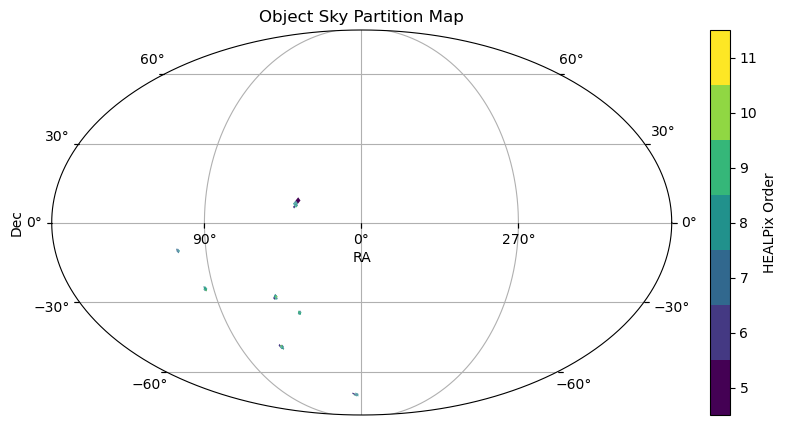

In [55]:
fig = object_cat.plot_pixels(plot_title="Object Sky Partition Map")

> **Figure 2:** An all-sky map showing the HEALPix partitions for the LSDB-formatted `object_collection` catalog.

Define a field of view (fov) and center in order to zoom-in on the partitions for the `object_collection` catalog, and re-create the plot. 

> **Warning:** The same `UserWarning` will show about small HEALPix pixels.

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/hats/inspection/visualize_catalog.py:303: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


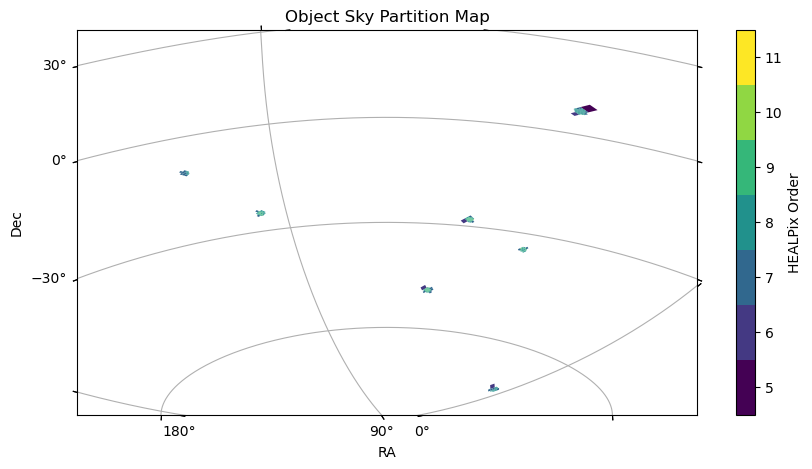

In [56]:
fov = (100 * u.deg, 120 * u.deg)
center = SkyCoord(70 * u.deg, -30 * u.deg)
fig = object_cat.plot_pixels(fov=fov, center=center,
                             plot_title="Object Sky Partition Map")

> **Figure 3:** A zoomed-in version of Figure 2.

## 4. Learn more about LSDB

As mentioned in Section 1, this notebook is intended only as a simple tutorial on LSDB DP1 catalogs.
For more detailed examples and advanced use cases, see [the full set of LSDB tutorials](https://docs.lsdb.io/en/latest/tutorials.html).
